In [33]:
import requests
import bs4 as bs
import pandas as pd

In [37]:
url = 'https://thuvienphapluat.vn/page/tim-van-ban.aspx?keyword=&area=0&type={}&status=0&lan=1&org=0&signer=0&match=True&sort=1'
cate=[
 ('46', 'Báo cáo'),
 ('1', 'Chỉ thị'),
 ('26', 'Công điện'),
 ('31', 'Điều ước quốc tế'),
 ('6', 'Hiến pháp'),
 ('9', 'Hướng dẫn'),
 ('45', 'Kế hoạch'),
 ('34', 'Lệnh'),
 ('10', 'Luật'),
 ('11', 'Nghị định'),
 ('13', 'Nghị quyết'),
 ('14', 'Pháp lệnh'),
 ('17', 'Quyết định'),
 ('18', 'Sắc lệnh'),
 ('21', 'Thông báo'),
 ('23', 'Thông tư'),
 ('24', 'Thông tư liên tịch'),
 ('40', 'Văn bản hợp nhất'),
 ('33', 'Văn bản khác'),
 ('32', 'Văn bản WTO')]

results = []

for cat in cate:
    res = requests.get(url.format(cat[0]))
    soup = bs.BeautifulSoup(res.text)
    total = soup.select('#lbTotal')
    total = int(total[0].text)
    print(cat[1], total)
    results.append((cat[1], total))

df = pd.DataFrame(results, columns=['type', 'total'])
#sort 
df = df.sort_values(by=['total'], ascending=False)
df.to_csv('data/tvpl_loaivanban.csv', index=False,header=False)

Báo cáo 1494
Chỉ thị 13438
Công điện 1244
Điều ước quốc tế 1331
Hiến pháp 5
Hướng dẫn 1772
Kế hoạch 23301
Lệnh 526
Luật 486
Nghị định 5191
Nghị quyết 30709
Pháp lệnh 228
Quyết định 188360
Sắc lệnh 997
Thông báo 13588
Thông tư 15067
Thông tư liên tịch 2605
Văn bản hợp nhất 2162
Văn bản khác 2608
Văn bản WTO 68


<Axes: ylabel='total'>

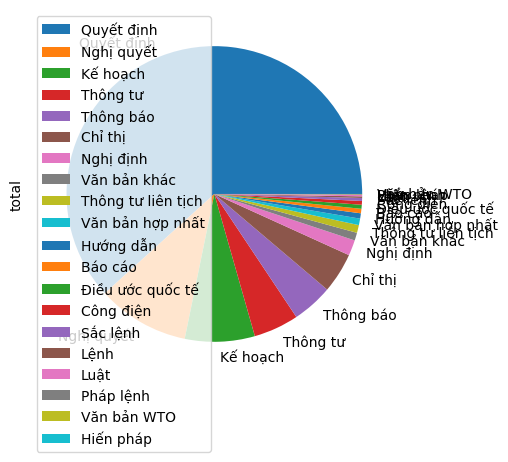

In [40]:
df.plot(
    kind='pie',
    y='total',
    labels=df['type'],
)

In [28]:
url = "https://thuvienphapluat.vn/page/tim-van-ban.aspx?keyword=&area=0"
res = requests.get(url)
soup=bs.BeautifulSoup(res.text)
results = []
li=soup.select_one('#tree').select('li')
for l in li:
    a = l.select('a')
    if len(a) > 1:
        print(a[0].text, a[1].text)
        results.append((a[0].text, int(a[1].text)))
df = pd.DataFrame(results, columns=['linhvuc', 'total'])
df = df.sort_values(by=['total'], ascending=False)
df.to_csv('data/tvpl_linhvuc.csv', index=False,     header=False)

Bộ máy hành chính 105445
Tài chính nhà nước 42216
Văn hóa - Xã hội 39014
Tài nguyên - Môi trường 25490
Thương mại 22388
Xây dựng - Đô thị 21410
Bất động sản 21149
Thể thao - Y tế 19734
Thuế - Phí - Lệ Phí 17592
Giáo dục 16278
Giao thông - Vận tải 14825
Lao động - Tiền lương 14374
Doanh nghiệp 12744
Đầu tư 12718
Công nghệ thông tin 12217
Xuất nhập khẩu 11535
Lĩnh vực khác 8607
Quyền dân sự 5505
Tiền tệ - Ngân hàng 4954
Bảo hiểm 2697
Dịch vụ pháp lý 2619
Thủ tục Tố tụng 2350
Vi phạm hành chính 2225
Kế toán - Kiểm toán 1752
Trách nhiệm hình sự 1515
Sở hữu trí tuệ 965
Chứng khoán 771
